In [27]:
require(ggplot2)


Loading required package: ggplot2


In [40]:
plotRates <- function(filename1, filename2, rate){
    data0 = read.table(paste0("/tmp/",filename1), header=F, sep="\t")
    names(data0) = c("duration", "node", "rdds", "tasks", "load")
    data0$node = paste0("3:", data0$node) 
    data1 = read.table(paste0("/tmp/",filename2), header=F, sep="\t")
    names(data1) = c("duration", "node", "rdds", "tasks", "load")
    data1$node = paste0("1:", data1$node)
    data = rbind(data0, data1)
    if(rate == "rdds"){
        g = ggplot(data=data, aes(x = duration, y = rdds, group = node)) + geom_line(aes(color = node)) + ylab(paste(rate, "per second"))
        plot(g)   
    }
    if(rate == "tasks"){
        g = ggplot(data=data, aes(x = duration, y = tasks, group = node)) + geom_line(aes(color = node)) + ylab(paste(rate, "per second"))
        plot(g)   
    }
    if(rate == "MB"){
        g = ggplot(data=data, aes(x = duration, y = load, group = node)) + geom_line(aes(color = node)) + ylab(paste(rate, "per second"))
        plot(g)   
    }
}


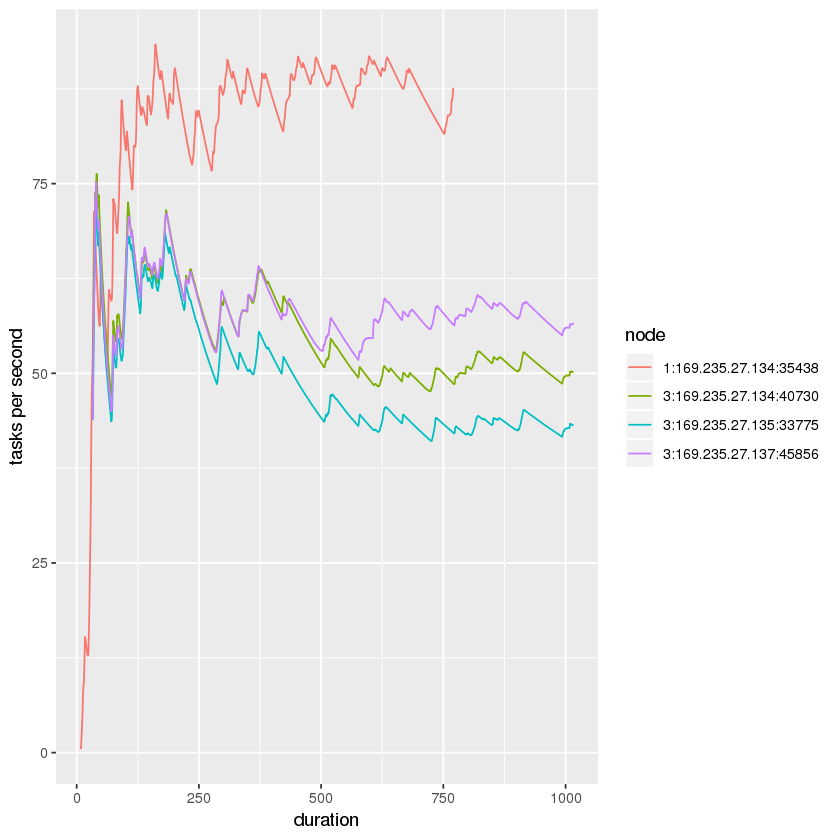

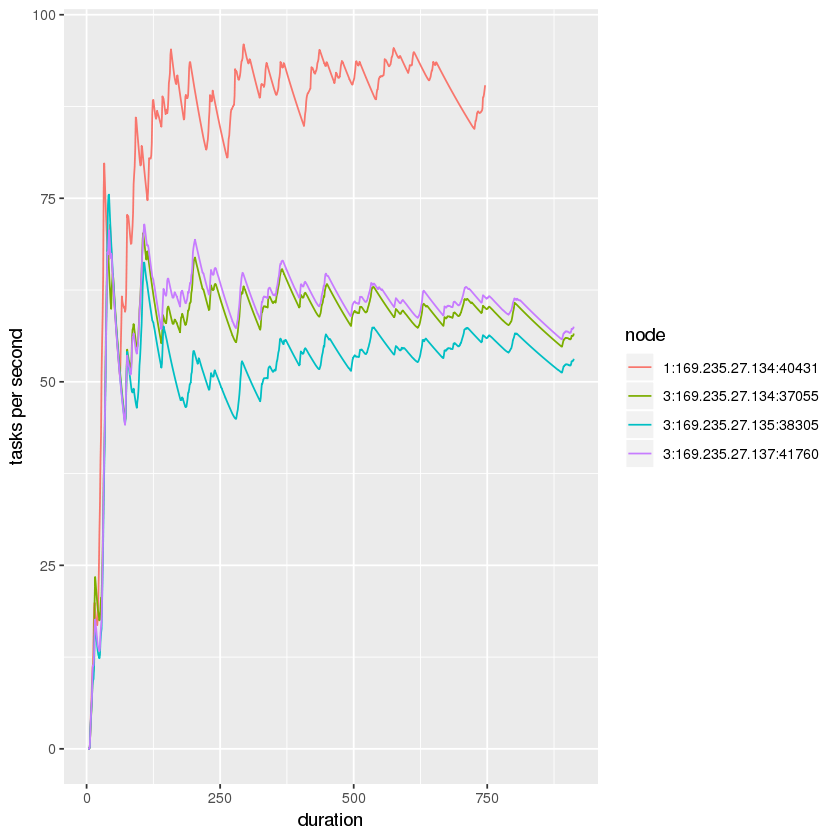

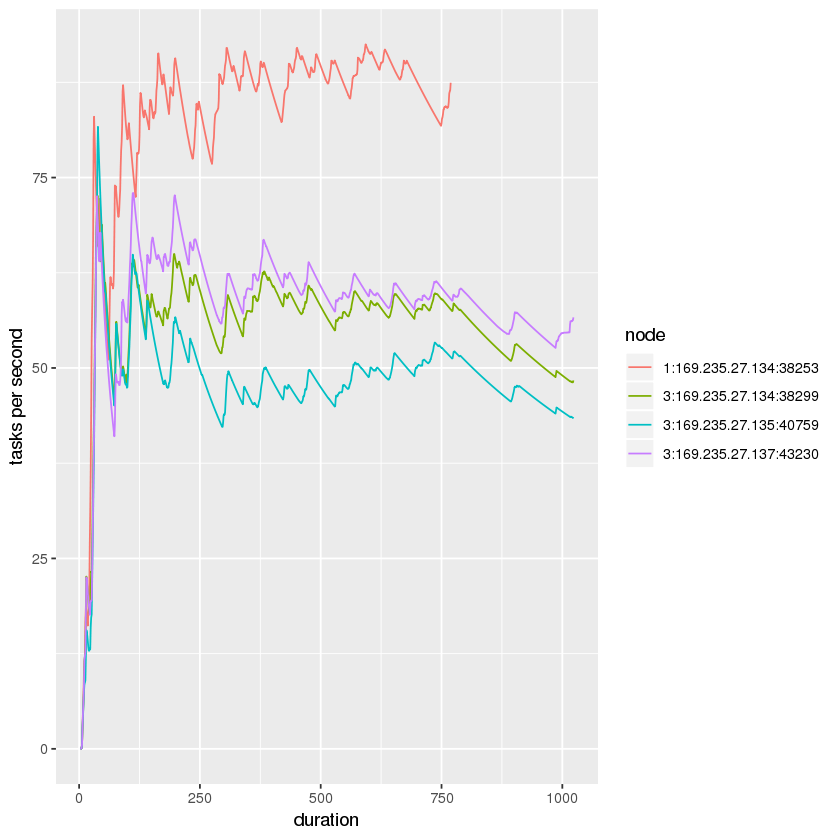

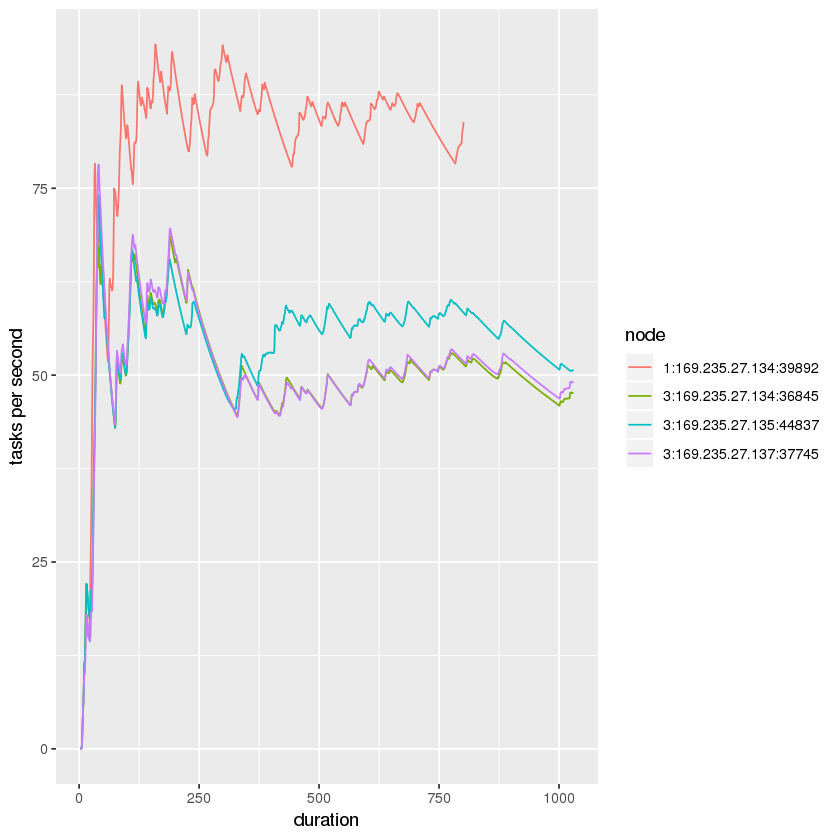

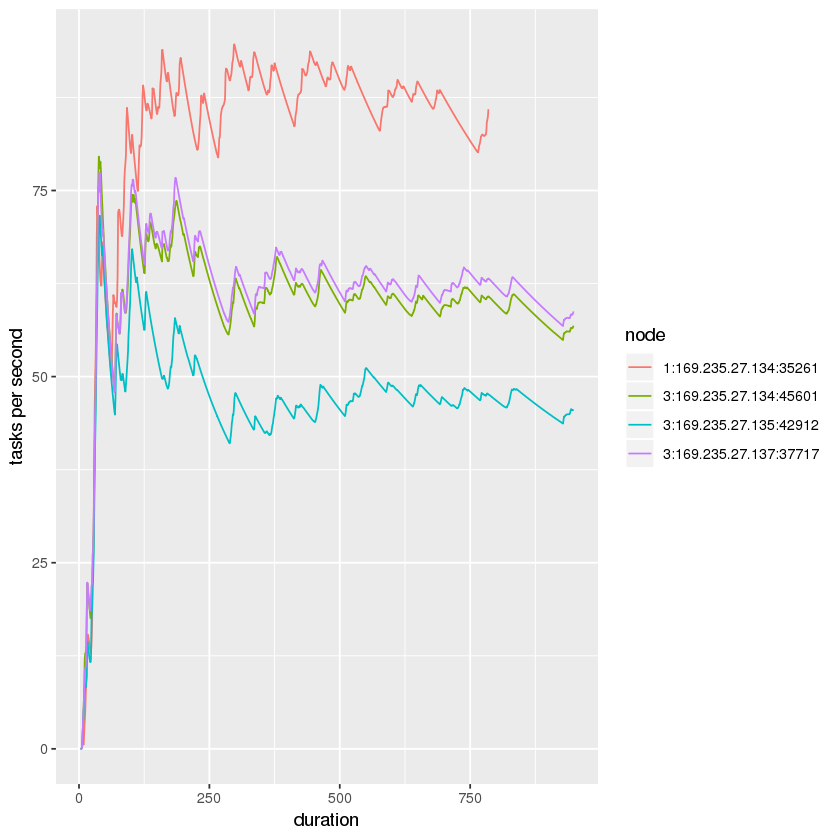

In [42]:
nodes3 = c("app-20190420115223-0000.tsv", "app-20190420122227-0002.tsv", "app-20190420125022-0004.tsv", "app-20190420132031-0006.tsv", "app-20190420135120-0008.tsv")
nodes1 = c("app-20190420120928-0001.tsv", "app-20190420123748-0003.tsv", "app-20190420130734-0005.tsv", "app-20190420133750-0007.tsv", "app-20190420140717-0009.tsv")
for(i in 1:5){
    plotRates(nodes3[i], nodes1[i], "tasks")
}

In [74]:
plotMetrics <- function(filename1, filename2, metric){
    stages = read.table("/tmp/stages.tsv", header = F, sep = "\t")
    names(stages) = c("appID", "s", "stage")
    appID = gsub("M", "-", strsplit(filename1,"\\.")[[1]][1])
    stages1 = stages[grep(appID, stages$appID), c("s", "stage")]
    appID = gsub("M", "-", strsplit(filename2,"\\.")[[1]][1])
    stages2 = stages[grep(appID, stages$appID), c("s", "stage")]

    data0 = read.table(paste0("/tmp/",filename1), header=F, sep="\t")
    names(data0) = c("duration", "node", "rdds", "tasks", "load")
    data0$node = paste0("3:", data0$node) 
    data1 = read.table(paste0("/tmp/",filename2), header=F, sep="\t")
    names(data1) = c("duration", "node", "rdds", "tasks", "load")
    data1$node = paste0("1:", data1$node)
    data = rbind(data0, data1)
    if(metric == "rdds"){
        g = ggplot(data=data, aes(x = duration, y = rdds, group = node)) + geom_line(aes(color = node)) + ylab(metric)
        plot(g)   
    }
    if(metric == "tasks"){
        g = ggplot(data=data, aes(x = duration, y = tasks, group = node)) + geom_line(aes(color = node)) + ylab(metric) + 
            geom_vline(xintercept = stages1$s, linetype="dashed", color = "blue", size = 0.05) + xlim(0,1100) + ylim(0,70000) +
            geom_vline(xintercept = stages2$s, linetype="dashed", color = "red",  size = 0.05) 
        plot(g)   
    }
    if(metric == "MB"){
        g = ggplot(data=data, aes(x = duration, y = load, group = node)) + geom_line(aes(color = node)) + ylab(metric)
        plot(g)   
    }
}

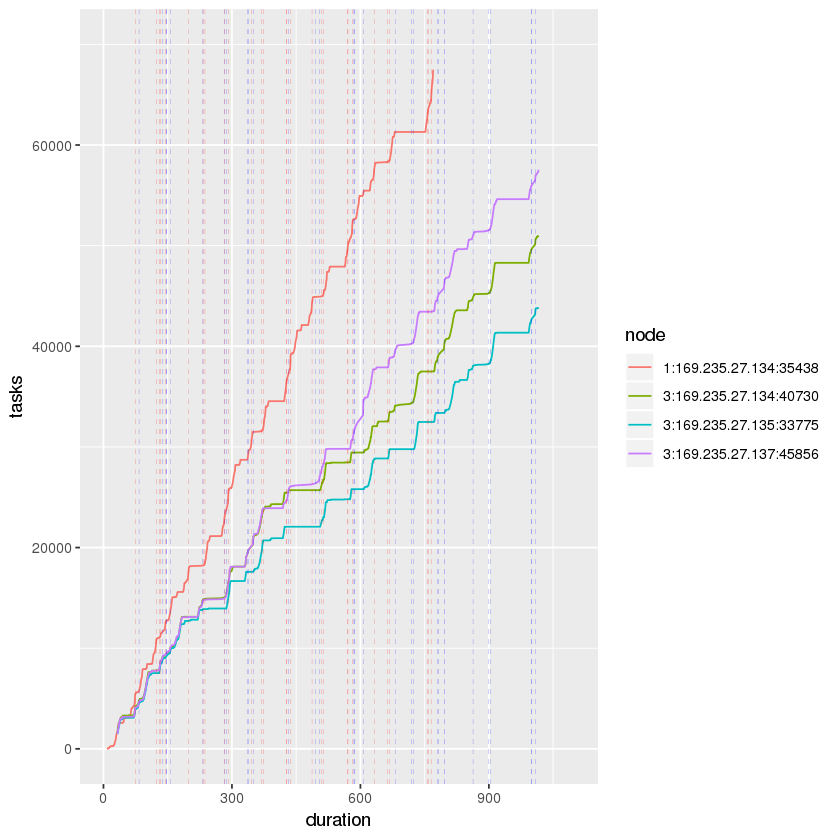

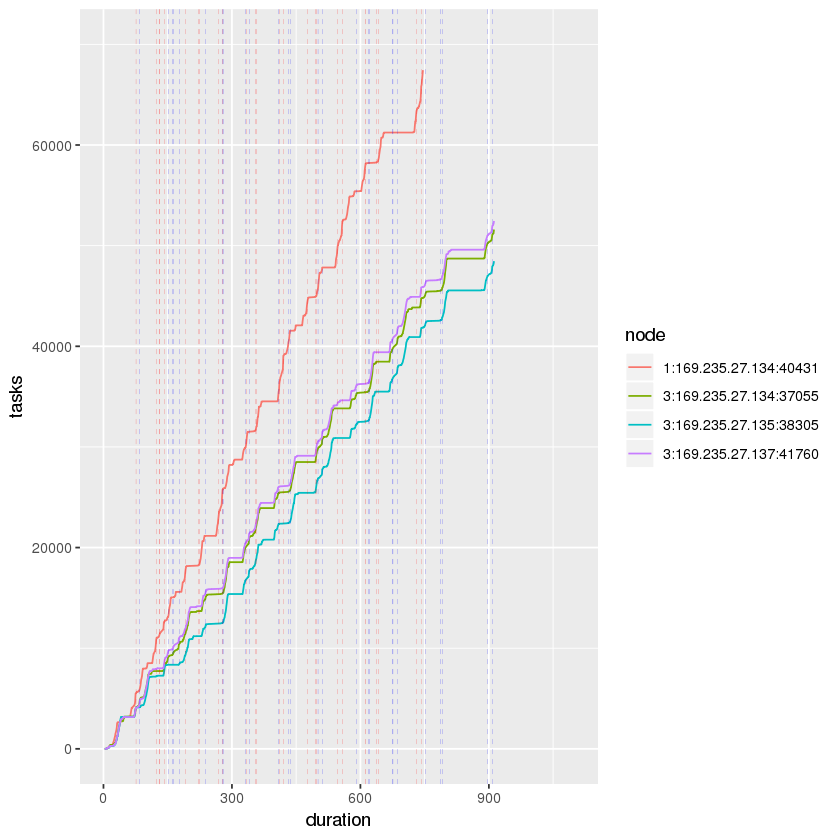

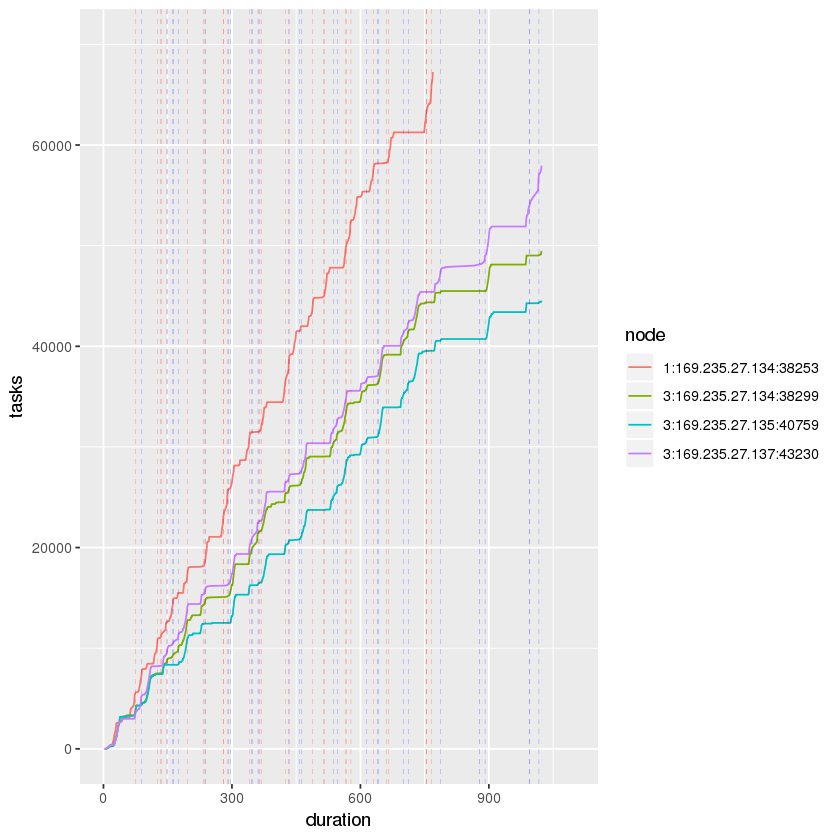

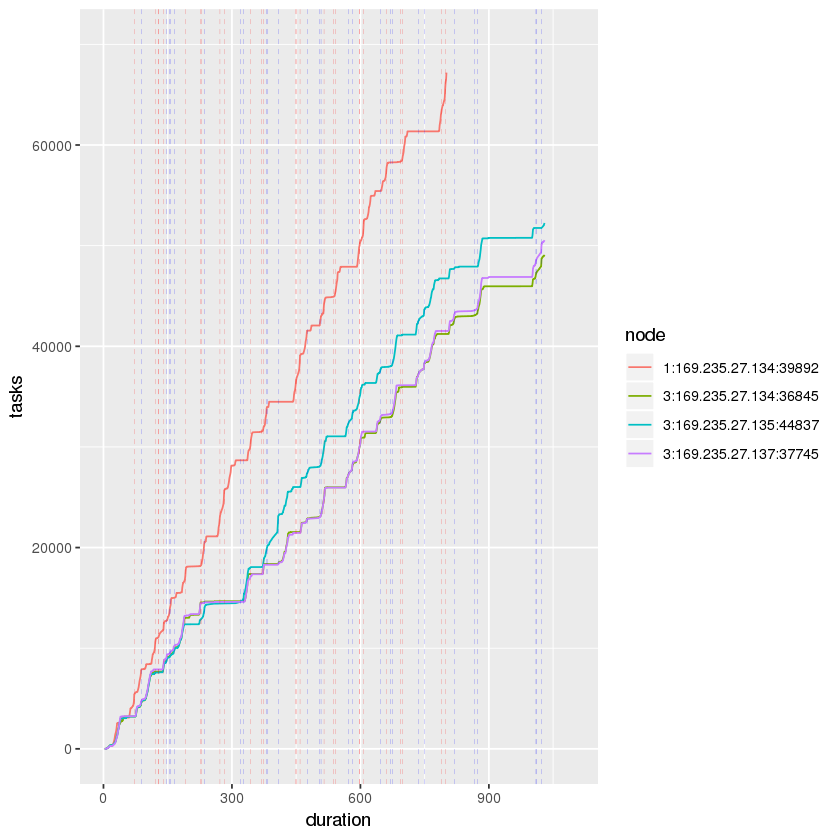

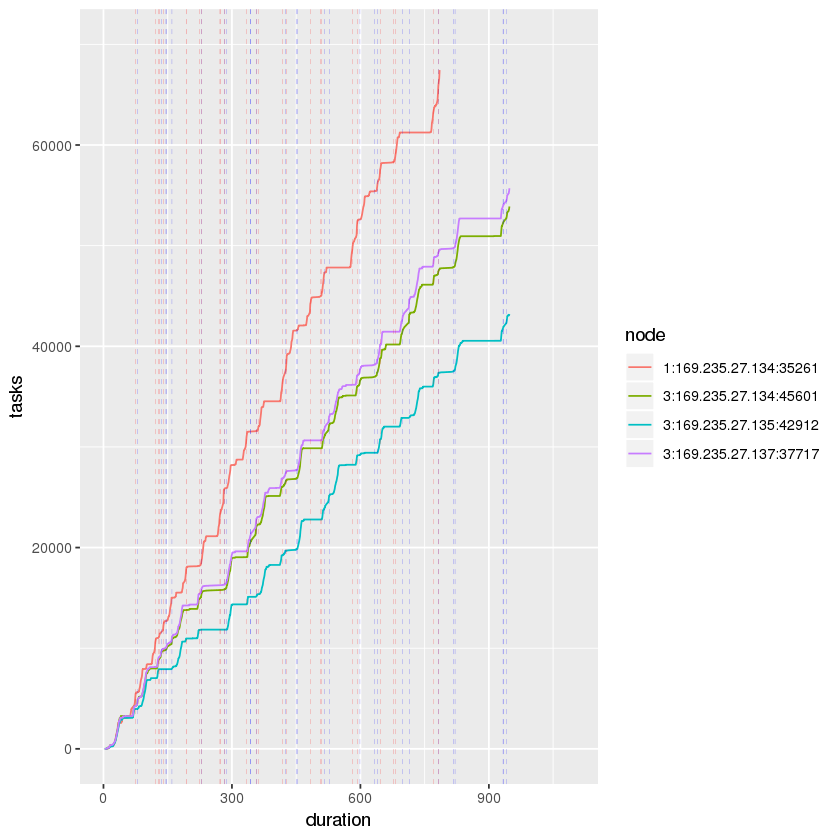

In [75]:
nodes3 = c("M0000.tsv", "M0002.tsv", "M0004.tsv", "M0006.tsv", "M0008.tsv")
nodes1 = c("M0001.tsv", "M0003.tsv", "M0005.tsv", "M0007.tsv", "M0009.tsv")
for(i in 1:5){
    plotMetrics(nodes3[i], nodes1[i], "tasks")
}

In [56]:
stages = read.table("/tmp/stages.tsv", header = F, sep = "\t")
names(stages) = c("appID", "s", "stage")
appID = gsub("M", "-", strsplit("M0000.tsv", "\\.")[0])
print(appID)
sample = stages[grep(appID, stages$appID), c("s", "stage")]


character(0)


ERROR: Error in grep(appID, stages$appID): invalid 'pattern' argument


In [59]:
strsplit("M0000.tsv", "\\.")[[1]][1]

[1] "M0000"